<a href="https://colab.research.google.com/github/dlhegend/-TS_Academy_Capstone_Project/blob/restore-main/notebooks/Agwemuria%20oghenegaren_TSA_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#**Loading And Exploration Of Dataset**

In [ ]:
df_ngn = pd.read_csv('/content/drive/MyDrive/NGX_ASI_Index_Price_Data.csv')

In [ ]:
df_ngn.head()

,date,avr_monthly_kiloprice
0,2012-Jan,20.80
1,2012-Feb,20.52
2,2012-Mar,20.92
3,2012-Apr,21.27
4,2012-May,22.41


In [ ]:
df_ngn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   137 non-null    object 
 1   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df_ngn.columns = df_ngn.columns.str.title()
df_ngn.columns = df_ngn.columns.str.replace("_"," ")

In [ ]:
df_ngn.head()

,Date,Avr Monthly Kiloprice
0,2012-Jan,20.80
1,2012-Feb,20.52
2,2012-Mar,20.92
3,2012-Apr,21.27
4,2012-May,22.41


In [ ]:
df_ngn['Date'] = pd.to_datetime(df_ngn['Date'])
df_ngn = df_ngn.set_index('Date')
df_ngn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2012-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avr Monthly Kiloprice  137 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [ ]:
df_ngn.describe()

,Avr Monthly Kiloprice
count,137.000000
mean,34.301241
std,8.428547
min,20.520000
25%,27.430000
50%,33.350000
75%,39.270000
max,55.080000


In [ ]:
df_ngn.isnull().sum()

,0
Avr Monthly Kiloprice,0


#**Data Visualization Showing Trend And Seasonality**

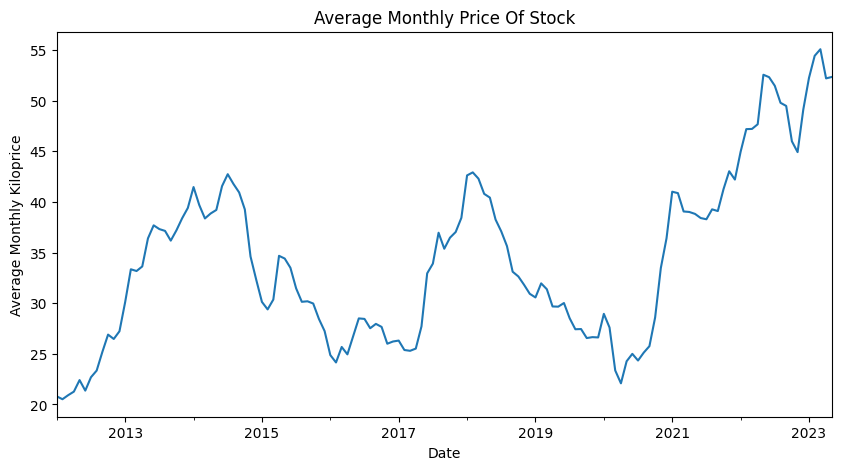

In [ ]:
df_ngn['Avr Monthly Kiloprice'].plot(title="Average Monthly Price Of Stock", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Average Monthly Kiloprice")
plt.show()

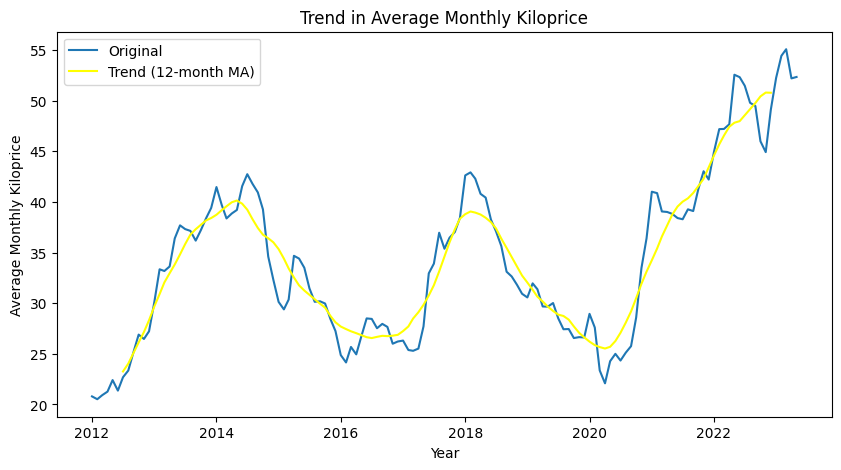

In [ ]:
df_ngn['Trend'] = df_ngn['Avr Monthly Kiloprice'].rolling(window=12, center=True).mean()

plt.figure(figsize=(10,5))
plt.plot(df_ngn['Avr Monthly Kiloprice'], label='Original')
plt.plot(df_ngn['Trend'], label='Trend (12-month MA)', color='yellow')
plt.title("Trend in Average Monthly Kiloprice")
plt.xlabel("Year")
plt.ylabel("Average Monthly Kiloprice")
plt.legend()
plt.show()

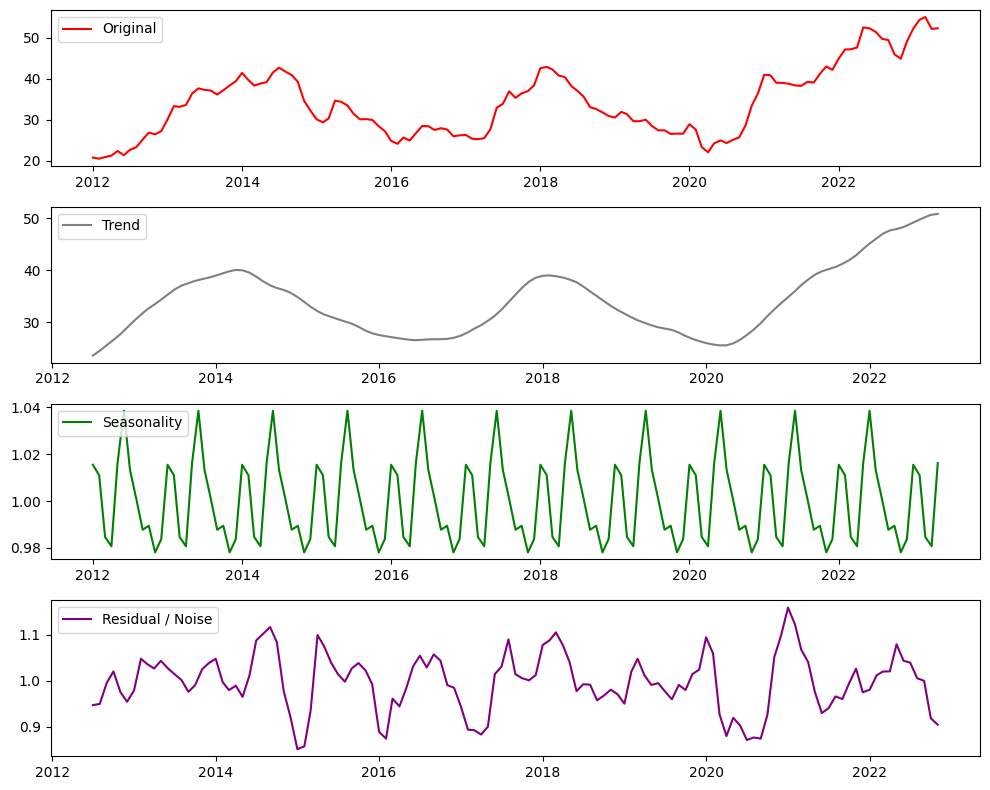

In [ ]:
decomposition = seasonal_decompose(df_ngn['Avr Monthly Kiloprice'], model='multiplicative', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(df_ngn['Avr Monthly Kiloprice'], label='Original', color='red')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='grey')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(residual, label='Residual / Noise', color='purple')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

##**Test For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df_ngn['Avr Monthly Kiloprice'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")


ADF Statistic: -1.6879689803233129
p-value: 0.4373216371351407
The series is likely non-stationary


In [ ]:
print(result)

(np.float64(-1.6879689803233129), np.float64(0.4373216371351407), 1, 135, {'1%': np.float64(-3.479742586699182), '5%': np.float64(-2.88319822181578), '10%': np.float64(-2.578319684499314)}, np.float64(482.9690778425961))


# **Making The Data Stationary**

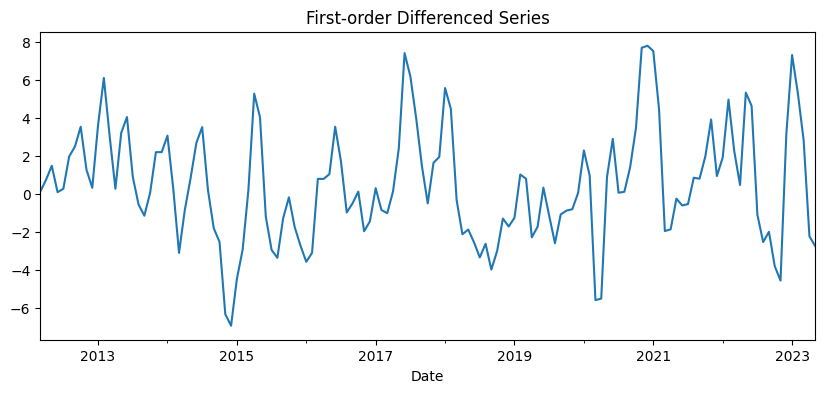

In [ ]:
# Since our dataset from the preceding code cell is not stationary, we need to make it stationary in order to use ARIMA models for analysis
# We'll be using the Differencing Method

df_ngn['Diff_1'] = df_ngn['Avr Monthly Kiloprice'] - df_ngn['Avr Monthly Kiloprice'].shift(2)

#Drop missing values
df_ngn_diff = df_ngn['Diff_1'].dropna()

df_ngn_diff.plot(title="First-order Differenced Series", figsize=(10,4))
plt.show()

In [ ]:
result_diff = adfuller(df_ngn_diff)

print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
if result_diff[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")


ADF Statistic: -3.863816803486728
p-value: 0.002317875265375661
The series is likely stationary


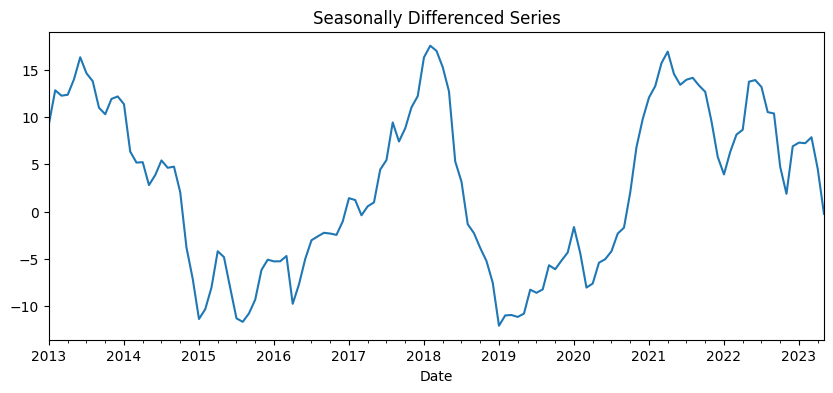

In [ ]:
# Method 2: Using Seasonal Differencing

df_ngn['Seasonal_Diff'] = df_ngn['Avr Monthly Kiloprice'] - df_ngn['Avr Monthly Kiloprice'].shift(12)
df_ngn_seasonal = df_ngn['Seasonal_Diff'].dropna()

df_ngn_seasonal.plot(title="Seasonally Differenced Series", figsize=(10,4))
plt.show()


In [ ]:
result = adfuller(df_ngn_seasonal)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")


ADF Statistic: -2.2818008462141313
p-value: 0.17790475474067885
The series is likely non-stationary


# **Using ARIMA Model**
* Since our data has been made stationary using the first order differencing method, we can go ahead to use ARIMA for forcasting

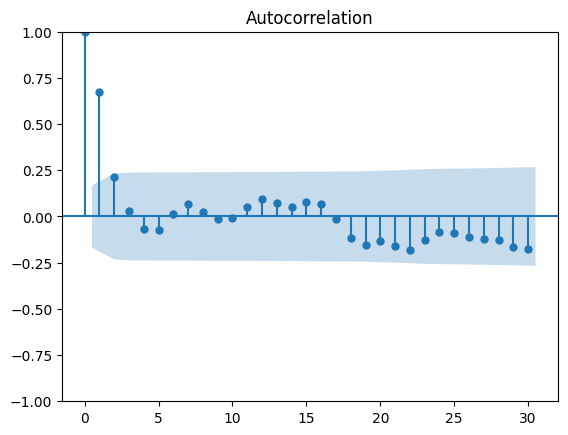

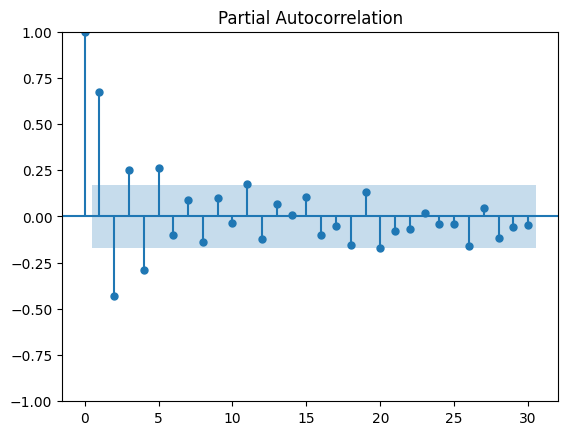

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Understanding patterns using ACF (Autocorrelation)
plot_acf(df_ngn_diff, lags=30)
plt.show()
# Understanding patterns using PACF (Patial Autocorrelation)
plot_pacf(df_ngn_diff, lags=30)
plt.show()

In [41]:
train_size = int(len(df_ngn) * 0.8)

train = df_ngn['Avr Monthly Kiloprice'][:train_size]
test = df_ngn['Avr Monthly Kiloprice'][train_size:]

In [42]:
train.head()

,Avr Monthly Kiloprice
Date,
2012-01-01,20.80
2012-02-01,20.52
2012-03-01,20.92
2012-04-01,21.27
2012-05-01,22.41


In [43]:
test.head()

,Avr Monthly Kiloprice
Date,
2021-02-01,40.87
2021-03-01,39.06
2021-04-01,39.01
2021-05-01,38.82
2021-06-01,38.41


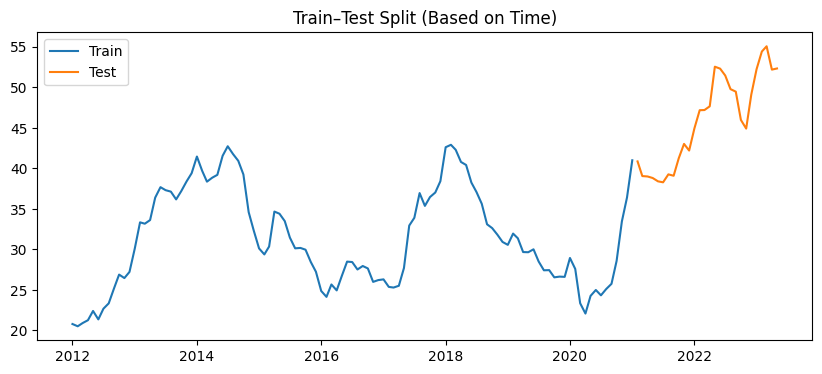

In [44]:
# Visualization of the Train and Test Splits
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title("Train–Test Split (Based on Time)")
plt.show()

In [45]:
# Fitting in the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 1, 3))
fitted_model = model.fit()

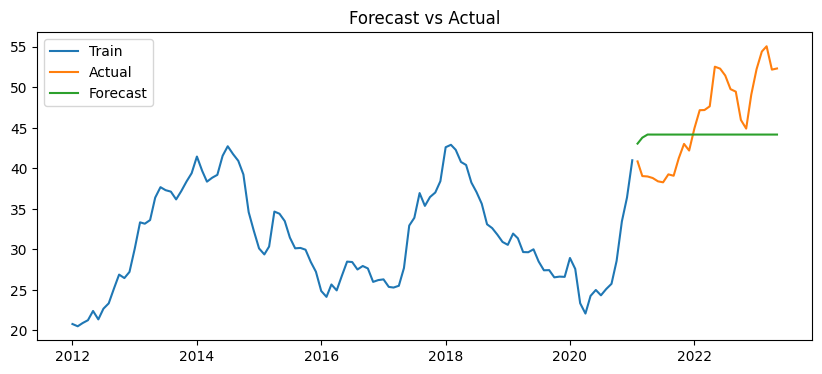

In [46]:
# Visualization of the Forcasted Model
forecast_1 = fitted_model.forecast(steps=len(test))

plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast_1, label='Forecast')
plt.legend()
plt.title("Forecast vs Actual")
plt.show()

**Conclution/Intertretation:** The ARIMA model fails to capture the upward structural shift observed in the test period. The forecast quickly converges to a constant value, indicating that the model assumes mean reversion rather than trend continuation. This suggests model underfitting and potential structural instability in the series.

# **Fitting Using SARIMA Model**

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(
    train,
    order=(1,1,3),
    seasonal_order=(1,1,3,12)
)
results = model.fit()

In [48]:
forecast_2 = results.forecast(steps=len(test))

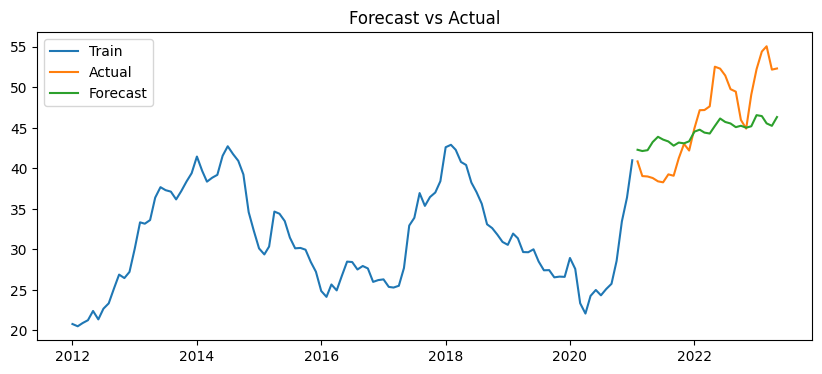

In [49]:
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast_2, label='Forecast')
plt.legend()
plt.title("Forecast vs Actual")
plt.show()

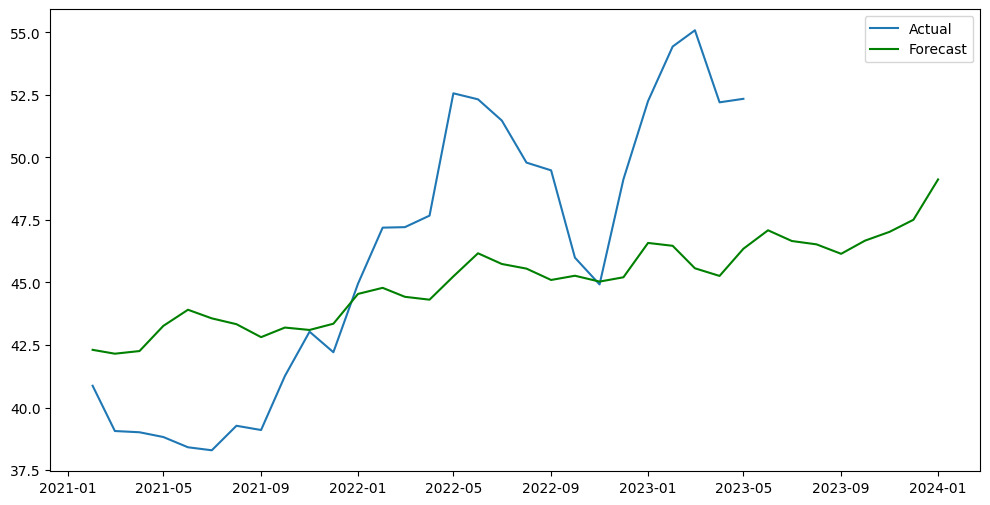

In [50]:
forecast = results.get_forecast(steps=36)

plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(forecast.predicted_mean, label='Forecast', color='green')
plt.legend()
plt.show()

 **Conclution:** The SARIMA model improves upon the ARIMA specification by incorporating seasonal dynamics, resulting in forecasts that better track the upward movement in the test period. However, the model continues to underestimate the magnitude of the increase and fails to capture abrupt volatility spikes, indicating limitations in modeling structural shifts and nonlinear behavior.